In [ ]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=4)
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# STATS 306
## Homework 4: Exploratory data analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Whisker plots
Suppose you are given the following whisker plot for $n=500$ samples of a random variable $x$:
![whiser](https://i.imgur.com/HazzZQQ.png)

## Problem 1: Whisker plots 

This question is worth 1 point overall. 

**(a)** About how many samples were between 0.2 and 0.5?  

In [ ]:
# 500(0.25) = 125
# between Q3 and maximum

**(b)** The bottom of the "box" is at 0.0. What is this value typically called? Explain how this is calculated. 

In [ ]:
# Lower Quartile (Q1)

**(c)** Explain what this plot tells us about our variable x. Why might you choose to make this plot? 

In [ ]:
# this plot tells me its minimum at -0.28, maximum at 0.5, median at 0.1, 25th quantile at 0.0,
# 75th quantile at 0.5, total of 4 outliers, and mean and median are approx. same as median at
# the center of the box
# useful to identify large data's median, outliers, and skewness

## Problem 2: Understanding air quality
This problem uses the air quality dataset that we studied in lecture:

In [ ]:
load(url('https://datasets.stats306.org/pm25.RData'))

In [ ]:
head(pm25)

,date,state,county,lat,lon,pm25,aqi
,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-01-01,Alabama,Baldwin,30.49748,-87.88026,5.0,21
2,2017-01-04,Alabama,Baldwin,30.49748,-87.88026,5.3,22
3,2017-01-10,Alabama,Baldwin,30.49748,-87.88026,4.5,19
4,2017-01-13,Alabama,Baldwin,30.49748,-87.88026,7.2,30
5,2017-01-16,Alabama,Baldwin,30.49748,-87.88026,3.9,16
6,2017-01-19,Alabama,Baldwin,30.49748,-87.88026,4.6,19


For each of the questions, produce an appropriate plot that visualizes the distribution or statistic, and explain why this type of plot is appropriate. (Note: multiple correct answers are possible.)

**(a)** The overall distribution of `pm25` across the entire dataset. (1/2 point)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


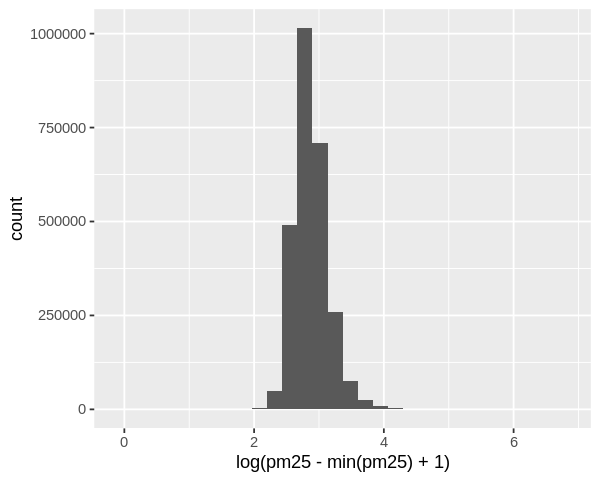

In [ ]:
pm25 %>%
  ggplot(aes(x = log(pm25 - min(pm25) + 1))) + 
  geom_histogram()

# used histogram to represent data of pm25, to set the appropriate interval and show the count

**(b)** The joint distribution of `pm25` and day of the week, considering only cases where `pm25` was less than 100. (1/2 point)  

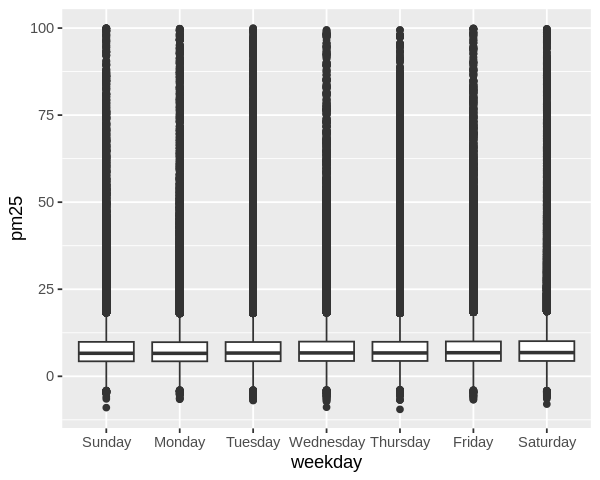

In [ ]:
pm25 %>%
  filter(pm25 < 100) %>%
  mutate(weekday = weekdays(date)) %>%
  group_by(weekday) %>%
  ggplot(aes(x = weekday, y = pm25)) +
  geom_boxplot() +
  scale_x_discrete(limits = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# used boxplot to represent joint distribution of pm25 and day of the week, to identify the difference in distribution
# and check possible outliers

**(c)** The average `pm25` level for each month for Midwest states. We've provided a vector defining Midwestern states. Please use this in your answer! (1 point) 

In [ ]:
midwest_states <- c("Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin")

Warning message in state == midwest_states:
“longer object length is not a multiple of shorter object length”


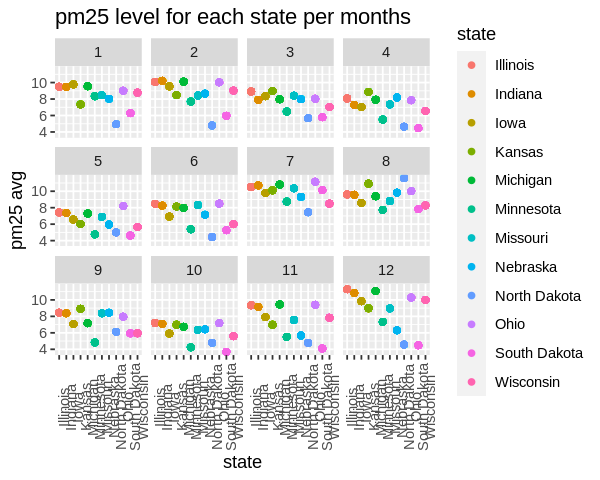

In [ ]:
pm25 %>%
  filter(state == midwest_states) %>%
  mutate(month = month(ymd(date))) %>%
  group_by(state, month)  %>%
  mutate(new_pm25 = mean(pm25)) %>%
  ggplot(aes(x = state, y = new_pm25)) +
  geom_point(aes(col = state)) +
  facet_wrap(~month) +
  ggtitle("pm25 level for each state per months") +
  ylab("pm25 avg") +
  theme(axis.text.x = element_text(angle = 90))


# used dot plot to represent average pm25 levels for each months for midwest states
# through dotplot, it is easier to see how each states were differ in pm25 level
# because there was three variables in total, state, pm25, and month, facet_wrap()
# used to put third variable, month and because it was hard to see the name of the 
# state, colorization was added to identify each states

**(d)** The US EPA considers PM2.5 levels greater than $35 \mu g/m^3$ to be dangerous. For each day, plot the proportion of counties in California with PM2.5 levels considered to be dangerous, out of all counties in California. What do you notice? Can you think of a reason to explain this pattern? (1 point)


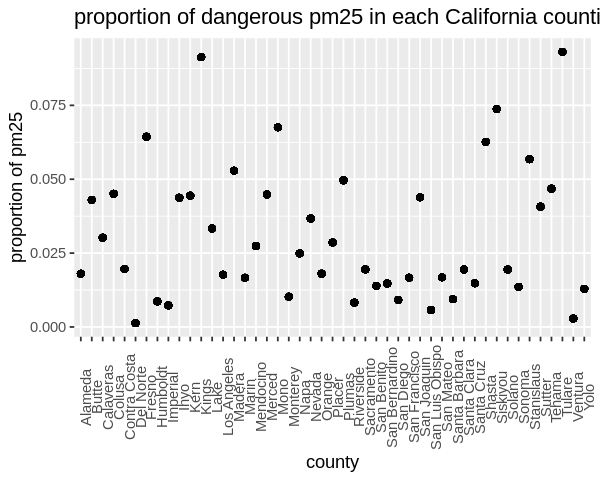

In [ ]:
pm25 %>%
  filter(state == 'California') %>%
  mutate(over = ifelse(pm25 > 35,1,0)) %>%
  group_by(state, county) %>%
  mutate(danger = mean(over)) %>%
  group_by(state, county, danger) %>%
  ggplot(aes(x = county, y = danger)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90)) +
  ggtitle("proportion of dangerous pm25 in each California counties") +
  ylab("proportion of pm25")

# used dot plot to represent proportion of dangerous pm25 levels for California counties for 
# through dotplot, it is easier to see how each counties were differ in proportion of dangerous pm25

**(e)** Define a state to be "large" if it has more than 15 counties, "medium" if it has more than 5 counties and no more than 15, and "small" if it has 5 or less counties. For each year, plot the average PM2.5 level (across all days in that year and all counties) for large, medium, and small states. (1 point)

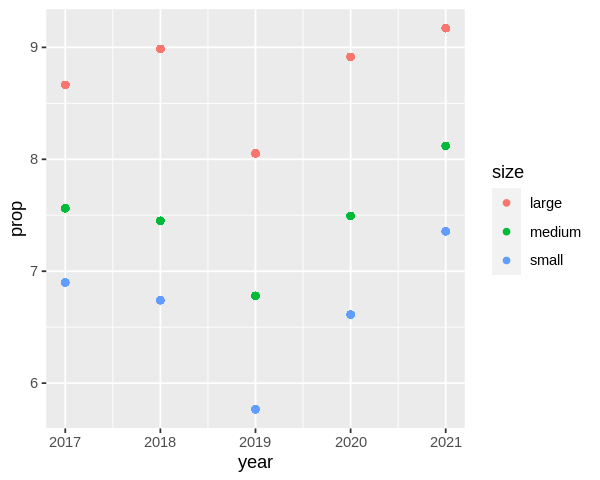

In [ ]:
pm25 %>%
  group_by(state) %>%
  mutate(year = year(ymd(date))) %>%
  mutate(number = n_distinct(county)) %>%
  mutate(size = case_when(number > 15 ~ 'large',
          number > 5 & number <= 15 ~ 'medium',
          number <= 5 ~ 'small')) %>%
  group_by(year, size) %>%
  mutate(prop = mean(pm25)) %>%
  ggplot(aes(x = year, y = prop)) +
  geom_point(aes(col = size))

# used dot plot to see exact place for each size at each year

## Problem 3: College football
The next few questions use a new data set. The file `cfb.RData` contains a table called `cfb` with information on 5,116 college football games played from 2011 to 2017:

In [ ]:
load(url('https://datasets.stats306.org/cfb.RData'))
head(cfb)

year,game,count,conf_game,week,winning,winning_conference,winning_h_a_n,winning_points,winning_f_u,⋯,losing_total_plays,losing_total_yards,losing_ypp,losing_to,losing_pen_yards,losing_top,ot?,thursday?,top_verification,o_u_total
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>
2011,1,1,Y,1,FIU,Sun Belt,H,41,F,⋯,73,301,4.12,1,45,1967,N,Y,3600,NA
2011,2,1,N,1,Wisconsin,Big 10,H,51,F,⋯,65,292,4.49,0,65,2060,N,Y,3600,NA
2011,3,1,N,1,Mississippi State,SEC,A,59,F,⋯,87,338,3.89,3,55,2240,N,Y,3600,NA
2011,4,1,N,1,Syracuse,Big East,H,36,F,⋯,84,406,4.83,1,94,2024,Y,Y,3600,NA
2011,5,1,N,1,Bowling Green,MAC,A,32,U,⋯,65,280,4.31,3,45,1181,N,Y,3600,NA
2011,6,1,N,1,Kentucky,SEC,N,14,F,⋯,69,234,3.39,4,120,2040,N,Y,3600,NA


(Each row of the table is one game, and contains various statistics for both the winning and losing teams.)

**(a)** College football is divided into various conferences. (UM is in the Big Ten conference.) **A conference game is a game where the `winning_conference` and `losing_conference` are the same**. For example, row 4631 of CFB is a conference game between Western Michigan and Buffalo, both in the Mid-American Conference. A total of 139 points were scored:

In [ ]:
cfb %>% slice(4631) %>% 
    select(winning, winning_conference, winning_points, 
           losing, losing_conference, losing_points)

winning,winning_conference,winning_points,losing,losing_conference,losing_points
<chr>,<chr>,<int>,<chr>,<chr>,<int>
W. Michigan,MAC,71,Buffalo,MAC,68


Certain conferences have a reputation for being higher scoring. Investigate this by restricting to conference games and producing a box-and-whisker plot that shows the distribution of total number of points scored per game (ppg) by conference from **2011 to 2015**. Ensure that the conference names in the plot are legible, and sort the conferences in order of the median ppg. Which conference had the highest scores? The lowest? Do you think these differences are real, or arose due to chance? (1 point)

Warning message in year == c(2011, 2012, 2013, 2014, 2015):
“longer object length is not a multiple of shorter object length”


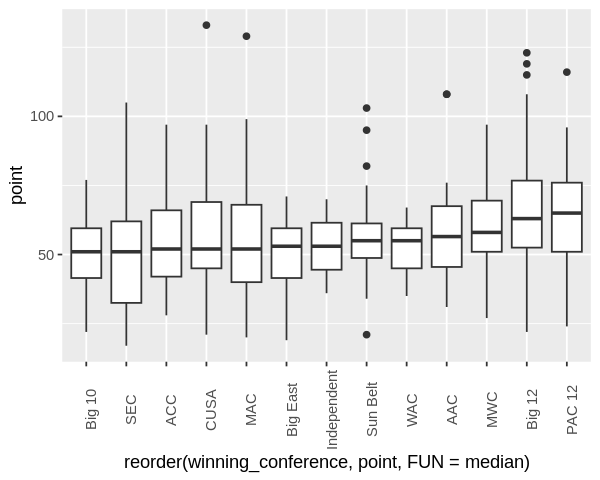

In [ ]:
cfb %>%
  filter(year == c(2011, 2012, 2013, 2014, 2015)) %>%
  mutate(conference_game = ifelse(winning_conference == losing_conference, T,F)) %>%
  filter(conference_game == T) %>%
  mutate(point = winning_points + losing_points) %>%
  group_by(winning_conference) %>%
  mutate(mean = mean(point)) %>%
  ggplot(aes(x = reorder(winning_conference, point, FUN = median), y = point)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90)) 

#conference with highest score was CUSA (highest median was PAC 12)
#conference with lowest score was SEC (lowest median was Big 10)
#these differences are arose due to chance, because it was outlier

**(b)** In football, two main offensive tactics to gain yardage territory are 



rushing and passing. Using the techniques we learned inm class for filtering and reshaping data, create a new table which contains only the data among Big 10 conference teams and shows the passing and rushing yardage for each year and week for each team. (1 point) 

If we sort such a table chronologically and in alphabetical order of team name, the first few rows are:

    # A tibble: 774 × 5
      year week  team           pass_yards rush_yards
      <int> <fct> <chr>              <int>      <int>
    1  2011 5     Michigan             217        363
    2  2011 5     Illinois             391         82
    3  2011 5     Penn State           271        193
    4  2011 5     Michigan State       250         71
    5  2011 5     Wisconsin            255        231

Note: It is fine to create two dataframes and combine them together at the end. 

In [ ]:
colnames(cfb)

[1] "year"                 "game"                 "count"               
 [4] "conf_game"            "week"                 "winning"             
 [7] "winning_conference"   "winning_h_a_n"        "winning_points"      
[10] "winning_f_u"          "winning_cover"        "winning_spread"      
[13] "winning_o_u"          "winning_passes"       "winning_pass_yards"  
[16] "winning_yppa"         "winning_rushes"       "winning_rush_yards"  
[19] "winning_ypra"         "winning_plays"        "winning_total_yards" 
[22] "winning_ypp"          "winning_to"           "winning_pen_yards"   
[25] "winning_top"          "field_25"             "losing"              
[28] "losing_conference"    "losing_h_a_n"         "losing_points"       
[31] "losing_f_u"           "losing_cover"         "losing_spread"       
[34] "losing_o_u"           "losing_passes"        "losing_pass_yards"   
[37] "losing_yppa"          "losing_rush_attempts" "losing_rush_yards"   
[40] "losing_ypra"          "losing_total_plays"   "losing_total_yards"  
[43] "losing_ypp"           "losing_to"            "losing_pen_yards"    
[46] "losing_top"           "ot?"                  "thursday?"           
[49] "top_verification"     "o_u_total"

In [ ]:
a <- cfb %>%
  filter(winning_conference == "Big 10" & losing_conference == "Big 10") %>% 
  select(year, week, team = winning, pass_yards = winning_pass_yards, rush_yards = winning_rush_yards)
  
b <- cfb %>%
  filter(winning_conference == "Big 10" & losing_conference == "Big 10") %>% 
  select(year, week, team = losing, pass_yards = losing_pass_yards, rush_yards = losing_rush_yards)

rbind(a,b) %>%
  arrange(year, as.integer(week), team) 

year,week,team,pass_yards,rush_yards
<int>,<chr>,<chr>,<int>,<int>
2011,5,Illinois,391,82
2011,5,Indiana,184,72
2011,5,Michigan,217,363
2011,5,Michigan State,250,71
2011,5,Minnesota,104,73
2011,5,Nebraska,176,159
2011,5,Northwestern,160,169
2011,5,Ohio State,143,35
2011,5,Penn State,271,193


**(c)** Some teams rely more on passing to gain yardage, while other rely more on rushing. Create an appropriate 
plot that visualizes the joint distribution of passing and rushing yardage for each team over. In your opinion, are there any outliers? What are they? Is there any reason for them to be outlying? (1 point) 

Note: you may need to use dplyr to extract the outliers from the table data. 

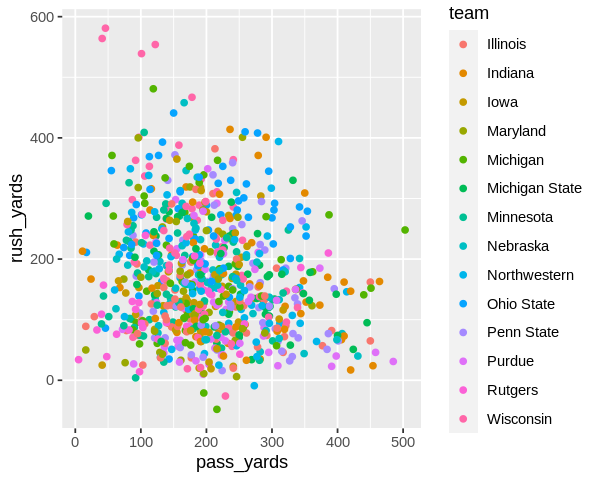

In [ ]:
rbind(a,b) %>%
  arrange(year, as.integer(week), team) %>%
  ggplot(aes(x = pass_yards, rush_yards)) +
  geom_point(aes(col = team))


# the relationship between pass_yards and rush_yards are not really related 
# also, as most data are located at left bottom center, we could assume that approx. similar rush_yards and pass_yards
# possible outliers are 4 dots on left top corner, which dots coming from team Wisconsin
# they are outliers because too high rush yards compare to low pass_yards
# it might be the result of their tactic that values more on rushing than passing

## Problem 4 (Challenge problem) 
The column `winning_h_a_n` shows whether the winning team was playing at **H**ome, **A**way, or on a **N**eutral field (not home to either team). Filter only to the records related to Michigan and produce a table which has five columns: `year`, `week`, `points`, `venue`, `outcome` where venue is `H/A/N` for `Home/Away/Neutral` and outcome is `winning` or `losing`. A subset of this table is provided below for reference: 

    # A tibble: 176 × 5
        year week  venue outcome points
       <int> <chr> <chr> <chr> <int>  
     1  2011  1      H   winning   34        
     2  2011  1      A   losing    10             
     3  2011  2      H   winning   35              
     4  2011  2      A   losing    31      
     5  2011  3      H   winning   31                          
     6  2011  3      A   losing    3             
     7  2011  4      H   winning   28             
     8  2011  4      A   losing    7            
     9  2011  5      H   winning   58       
     10 2011  5      A   losing    0           

Michigan Stadium, nicknamed "The Big House," is the football stadium for the University of Michigan with the capacity of 107,601 which can potentially house 100,000+ Wolverine fans.

Does Michigan win more *at the Big House* ? In other words, is the proportion of games won by Michigan statistically different from proportion of games won by the away team at the Big House ? Use the above table to perform a hypothesis test and draw conclusion.

(Hint: In STATS 250 you learned how to test this. This test is implemented in R using the binom.test function.)

In [ ]:
df1 <- cfb %>%
  filter(winning == 'Michigan' | losing == 'Michigan') %>%
  mutate(outcome = case_when(winning == 'Michigan' ~ 'winning', 
                            losing == 'Michigan' ~ 'losing')) %>%
  select(year, week, venue = winning_h_a_n, losing_h_a_n, outcome,  points = winning_points, losing_points) %>%
  mutate(venue = ifelse(outcome == "losing", losing_h_a_n, venue)) %>%
  mutate(points = ifelse(outcome == "losing", losing_points, points)) %>%
  select(year, week, venue, outcome, points)

df1 %>%
  filter(venue == 'H') %>%
  nrow()

#47 total home game

df1 %>%
  filter(venue == 'H', outcome == 'winning') %>%
  nrow()

#38 total wins for Michigan
#9 total wins for away teams

df1 %>%
  nrow()

#Michigan had 88 total games

df1 %>%
  filter(outcome == 'winning') %>%
  nrow()

#and 57 winning out of 88
#so winning prob is 57/88


binom.test(x = 38, n = 47, alternative = "greater")


#Ho: Pmich = Paway
#Ha: Pmich > Paway
#since p-value < 0.05, the difference is statistically significant
#we have strong evidence to claim that probability of Michigan winning at
#the big house is greater than away team winning at the big house



[1] 47

[1] 38

[1] 88

[1] 57


	Exact binomial test

data:  38 and 47
number of successes = 38, number of trials = 47, p-value = 1.245e-05
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.6896285 1.0000000
sample estimates:
probability of success 
             0.8085106 
